In [43]:
!pip install pandas_datareader==0.7.0

In [45]:
# Import pandas datareader
import pandas_datareader
pandas_datareader.__version__

'0.7.0'

In [46]:
from pandas_datareader import data as pdr
import pickle
import requests
#import yfinance as yf
#yf.pdr_override
import bs4 as bs
import datetime as dt
import os
print("Downloading SP tickers from wikipedia....")
reqsp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(reqsp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
# read data from table
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text.replace('.', '-')
    ticker = ticker[:-1]
    tickers.append(ticker)

# save tickers
with open("./tickers.pickle", "wb") as f:
    pickle.dump(tickers, f)
print("tickers saved")

tickers saved


In [47]:
print("Downloading stock data....")
with open("./tickers.pickle", "rb") as f:
    tickers = pickle.load(f)
if not os.path.exists('stock_data'):
    os.makedirs('stock_data')
start = dt.datetime(1988, 6, 8)
end = dt.datetime.now()
for ticker in tickers:
    print(ticker)
    if not os.path.exists('stock_data/{}.csv'.format(ticker)):
        df = pdr.get_data_yahoo(ticker, start, end)
        df.reset_index(inplace=True)
        df.set_index("Date", inplace=True)
        df.to_csv('stock_data/{}.csv'.format(ticker))
    else:
        print('Already have {}'.format(ticker))
        
        

MMM
Already have MMM
ABT
Already have ABT
ABBV
Already have ABBV
ABMD
Already have ABMD
ACN
Already have ACN
ATVI
Already have ATVI
ADBE
Already have ADBE
AMD
Already have AMD
AAP
Already have AAP
AES
Already have AES
AMG
Already have AMG
AFL
Already have AFL
A
Already have A
APD
Already have APD
AKAM
Already have AKAM
ALK
Already have ALK
ALB
Already have ALB
ARE
Already have ARE
ALXN
Already have ALXN
ALGN
Already have ALGN
ALLE
Already have ALLE
AGN
Already have AGN
ADS
Already have ADS
LNT
Already have LNT
ALL
Already have ALL
GOOGL
Already have GOOGL
GOOG
Already have GOOG
MO
Already have MO
AMZN
Already have AMZN
AMCR
Already have AMCR
AEE
Already have AEE
AAL
Already have AAL
AEP
Already have AEP
AXP
Already have AXP
AIG
Already have AIG
AMT
Already have AMT
AWK
Already have AWK
AMP
Already have AMP
ABC
Already have ABC
AME
Already have AME
AMGN
Already have AMGN
APH
Already have APH
ADI
Already have ADI
ANSS
Already have ANSS
ANTM
Already have ANTM
AON
Already have AON
AOS
Alre

In [59]:

from pandas_datareader import data as pdr
import datetime
start=datetime.datetime(2011,1,1)
end=datetime.date.today()
Dataset = pdr.get_data_yahoo('AMZN',start,end)
Dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,186.000000,181.210007,181.369995,184.220001,5331400,184.220001
2011-01-04,187.699997,183.779999,186.149994,185.009995,5031800,185.009995
2011-01-05,187.449997,184.070007,184.100006,187.419998,3418800,187.419998
2011-01-06,187.410004,185.250000,186.500000,185.860001,3179700,185.860001
2011-01-07,188.449997,183.740005,187.880005,185.490005,5221700,185.490005
2011-01-10,185.289993,182.509995,185.039993,184.679993,3375900,184.679993
2011-01-11,186.000000,183.210007,185.419998,184.339996,2814200,184.339996
2011-01-12,185.380005,183.300003,185.360001,184.080002,2679100,184.080002
2011-01-13,186.449997,183.509995,183.600006,185.529999,3367000,185.529999


In [64]:
Dataset.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,186.000000,181.210007,181.369995,184.220001,5331400,184.220001
2011-01-04,187.699997,183.779999,186.149994,185.009995,5031800,185.009995
2011-01-05,187.449997,184.070007,184.100006,187.419998,3418800,187.419998
2011-01-06,187.410004,185.250000,186.500000,185.860001,3179700,185.860001
2011-01-07,188.449997,183.740005,187.880005,185.490005,5221700,185.490005


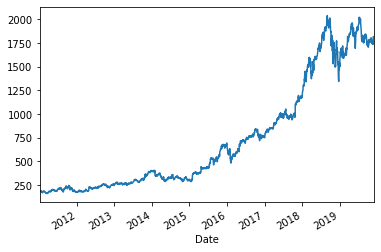

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
Dataset['Adj Close'].plot()
plt.show()

# Exploratory data analysis

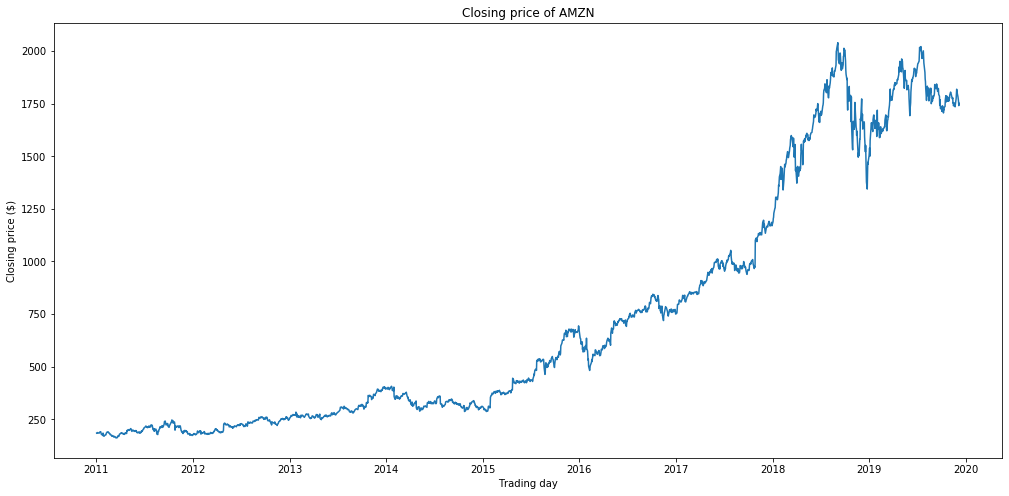

In [70]:
plt.figure(figsize=(17, 8))
plt.plot(Dataset.Close)
plt.title('Closing price of AMZN')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [71]:
Dataset

In [73]:
#creation of column
Dataset['Daily Lag']=Dataset['Close'].shift(1)
Dataset.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag
Date,,,,,,,
2011-01-03,186.000000,181.210007,181.369995,184.220001,5331400,184.220001,NaN
2011-01-04,187.699997,183.779999,186.149994,185.009995,5031800,185.009995,184.220001
2011-01-05,187.449997,184.070007,184.100006,187.419998,3418800,187.419998,185.009995
2011-01-06,187.410004,185.250000,186.500000,185.860001,3179700,185.860001,187.419998
2011-01-07,188.449997,183.740005,187.880005,185.490005,5221700,185.490005,185.860001


In [74]:
Dataset['Daily Returns']=(Dataset['Daily Lag']/Dataset['Close'])-1
Dataset.head()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
Date,,,,,,,,
2011-01-03,186.000000,181.210007,181.369995,184.220001,5331400,184.220001,NaN,NaN
2011-01-04,187.699997,183.779999,186.149994,185.009995,5031800,185.009995,184.220001,-0.004270
2011-01-05,187.449997,184.070007,184.100006,187.419998,3418800,187.419998,185.009995,-0.012859
2011-01-06,187.410004,185.250000,186.500000,185.860001,3179700,185.860001,187.419998,0.008393
2011-01-07,188.449997,183.740005,187.880005,185.490005,5221700,185.490005,185.860001,0.001995


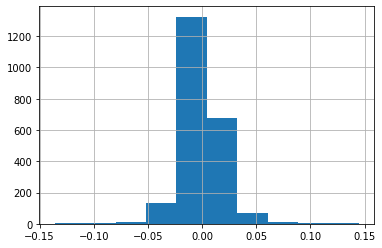

In [76]:
Dataset['Daily Returns'].hist()

In [77]:
#mean, median,mode,min,max and quantilies
Dataset.describe()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
count,2248.000000,2248.000000,2248.000000,2248.000000,2.248000e+03,2248.000000,2247.000000,2247.000000
mean,735.554706,720.632393,728.703737,728.459400,4.228421e+06,728.459400,728.004064,-0.000815
std,582.485087,571.310769,577.641233,577.118823,2.414491e+06,577.118823,576.843255,0.019334
min,163.539993,160.589996,161.190002,160.970001,9.844000e+05,160.970001,160.970001,-0.136037
25%,269.032494,263.459999,265.989998,266.247505,2.707825e+06,266.247505,266.145004,-0.011040
50%,439.000000,432.994995,435.410004,436.165009,3.621900e+06,436.165009,436.040009,-0.000981
75%,1003.520020,990.267517,998.772507,995.905014,4.927600e+06,995.905014,995.835022,0.008166
max,2050.500000,2013.000000,2038.109985,2039.510010,2.413420e+07,2039.510010,2039.510010,0.144909


In [81]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2248 entries, 2011-01-03 to 2019-12-06
Data columns (total 8 columns):
High             2248 non-null float64
Low              2248 non-null float64
Open             2248 non-null float64
Close            2248 non-null float64
Volume           2248 non-null int64
Adj Close        2248 non-null float64
Daily Lag        2247 non-null float64
Daily Returns    2247 non-null float64
dtypes: float64(7), int64(1)
memory usage: 158.1 KB


In [85]:
Dataset.Close.value_counts()

229.710007     2
189.250000     2
213.210007     2
1855.319946    2
225.050003     2
182.259995     2
246.220001     2
179.029999     2
192.399994     2
223.899994     2
370.559998     2
302.859985     2
361.079987     2
1665.530029    2
265.739990     2
312.010010     2
961.349976     2
182.520004     2
1804.660034    2
375.140015     2
1390.000000    2
219.500000     2
233.779999     2
488.100006     2
194.130005     2
175.929993     2
1619.439941    2
188.389999     2
222.520004     2
635.349976     2
              ..
371.920013     1
1521.949951    1
251.250000     1
708.349976     1
742.630005     1
1011.340027    1
956.400024     1
958.489990     1
181.660004     1
389.989990     1
324.200012     1
1010.270020    1
670.650024     1
351.779999     1
229.449997     1
1844.869995    1
570.760010     1
301.190002     1
252.490005     1
995.890015     1
331.329987     1
381.829987     1
1823.540039    1
423.670013     1
1581.329956    1
318.119995     1
970.669983     1
440.100006    

In [87]:
Dataset.corr()

,High,Low,Open,Close,Volume,Adj Close,Daily Lag,Daily Returns
High,1.000000,0.999784,0.999892,0.999857,0.045444,0.999857,0.999761,-0.001514
Low,0.999784,1.000000,0.999823,0.999874,0.033922,0.999874,0.999673,-0.003739
Open,0.999892,0.999823,1.000000,0.999717,0.041080,0.999717,0.999832,0.004036
Close,0.999857,0.999874,0.999717,1.000000,0.039315,1.000000,0.999585,-0.009309
Volume,0.045444,0.033922,0.041080,0.039315,1.000000,0.039315,0.041113,0.044459
Adj Close,0.999857,0.999874,0.999717,1.000000,0.039315,1.000000,0.999585,-0.009309
Daily Lag,0.999761,0.999673,0.999832,0.999585,0.041113,0.999585,1.000000,0.012617
Daily Returns,-0.001514,-0.003739,0.004036,-0.009309,0.044459,-0.009309,0.012617,1.000000


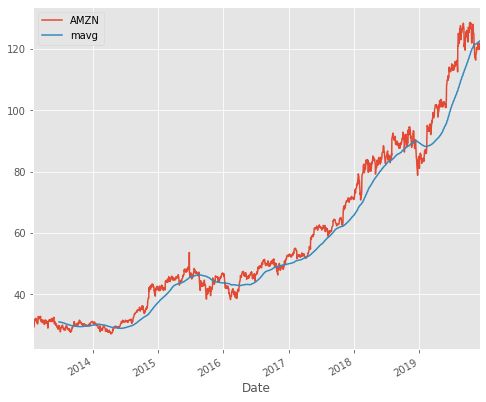

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AMZN')
mavg.plot(label='mavg')
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d474198>,
      dtype=object)

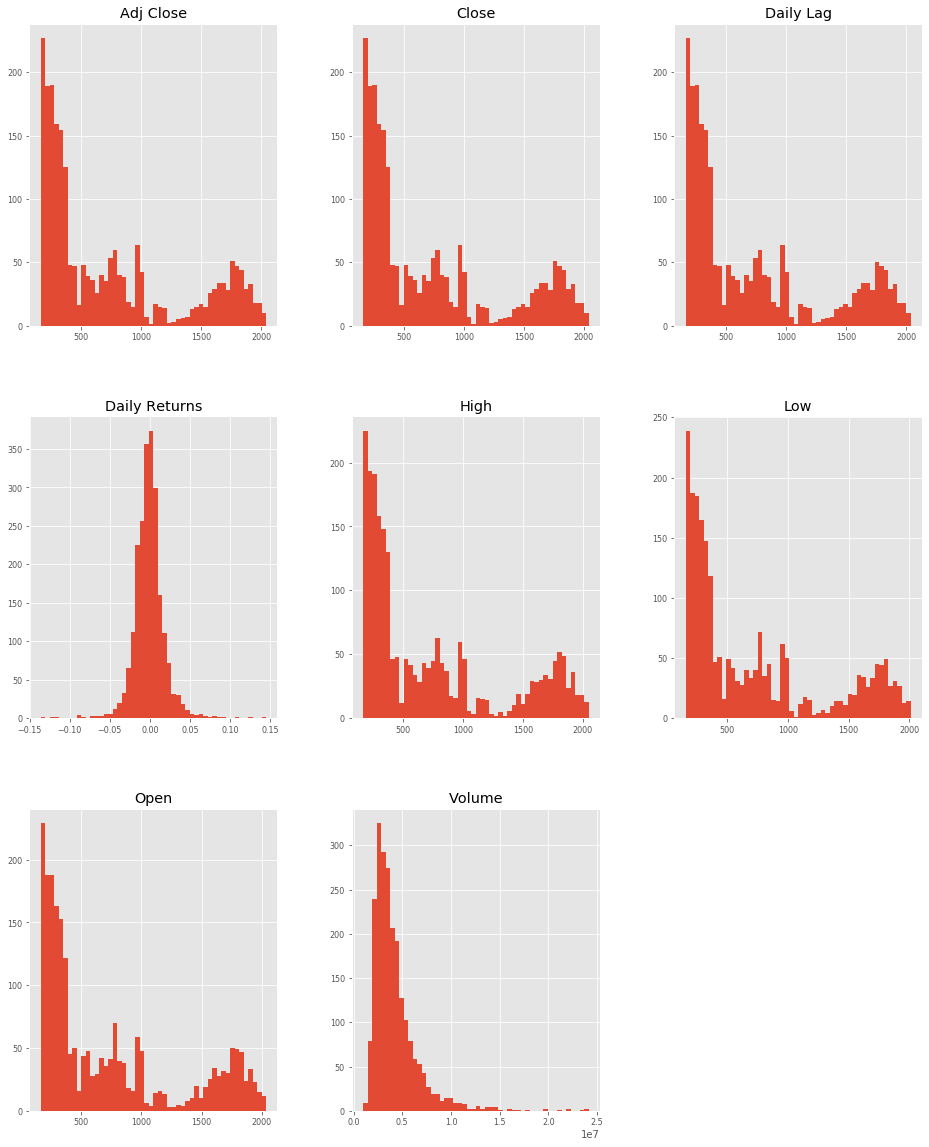

In [93]:
Dataset.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

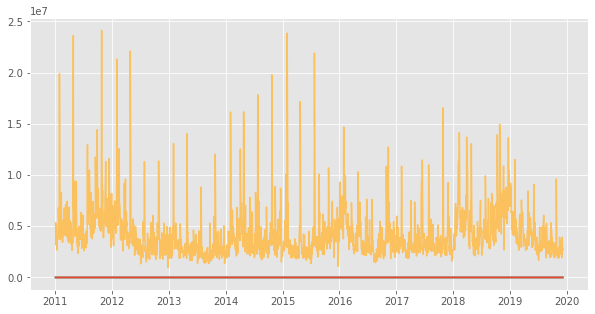

In [98]:
#Intital Visual exploratory anaysis of Time series
plt.figure(figsize=(10,5))
plt.plot(Dataset)
plt.show()

#in thr following graph, Amazon stock prices from 2011-1-1 to 2020-1-1 are shown
#from the analysis of the graph we can see that prices have decreased over time. In particular, starting 2016 the decrease has shown an exponential trend.

[]

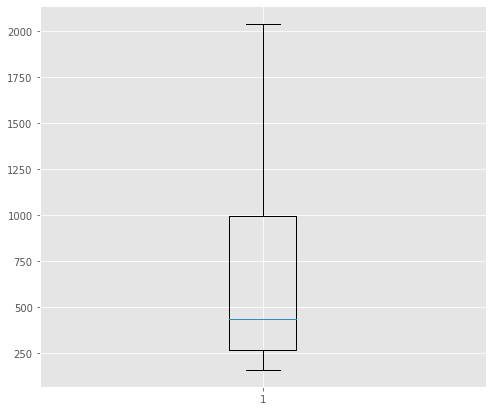

In [107]:
plt.boxplot(Dataset.Close)
plt.plot()

In [113]:
!pip install seaborn

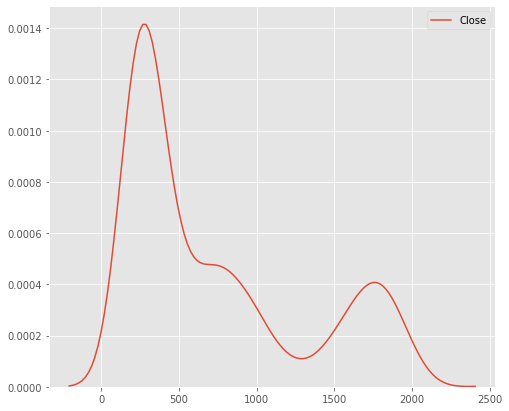

In [117]:
#Visulaization of the data
import seaborn as sns
sns.kdeplot(Dataset.Close)

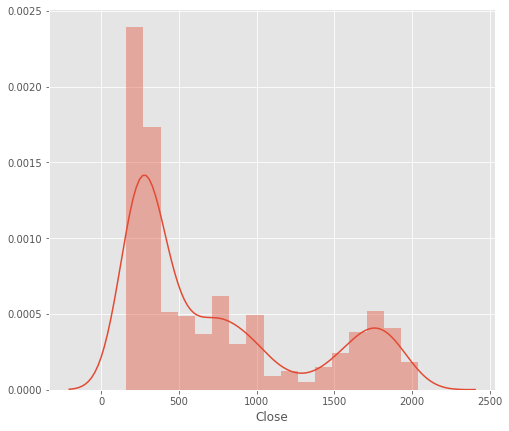

In [119]:
# visulaization of data with additional details
sns.distplot(Dataset.Close)

In [122]:
#pivot the data
Ds= Dataset.pivot("Open","Close","High")
Ds

Close,160.97000122070312,161.82000732421875,162.60000610351562,164.52000427246094,164.6999969482422,165.0800018310547,165.32000732421875,166.13999938964844,166.72999572753906,166.88999938964844,...,2002.3800048828125,2003.0,2004.3599853515625,2009.9000244140625,2011.0,2012.7099609375,2012.97998046875,2017.4100341796875,2020.989990234375,2039.510009765625
Open,,,,,,,,,,,,,,,,,,,,,
161.190002,NaN,163.539993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161.389999,NaN,NaN,NaN,NaN,NaN,166.880005,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162.300003,NaN,NaN,NaN,NaN,NaN,NaN,166.259995,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163.369995,NaN,NaN,NaN,165.789993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.070007,NaN,NaN,164.440002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164.699997,NaN,NaN,NaN,NaN,168.139999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165.910004,166.300003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166.600006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.080002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


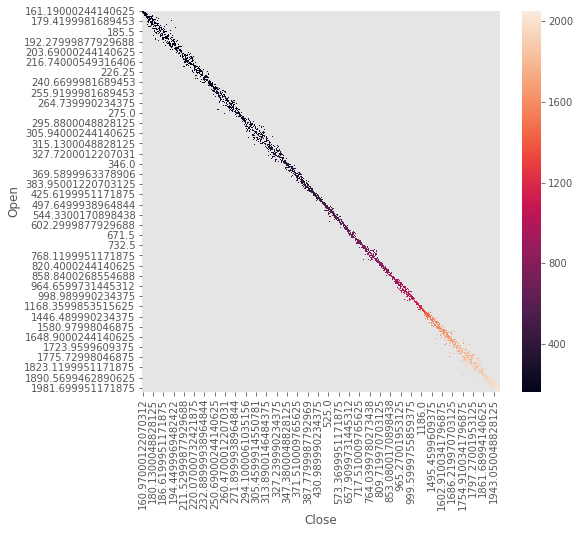

In [123]:
#visualize our data
sns.heatmap(Ds)

In [126]:
!pip install missingno

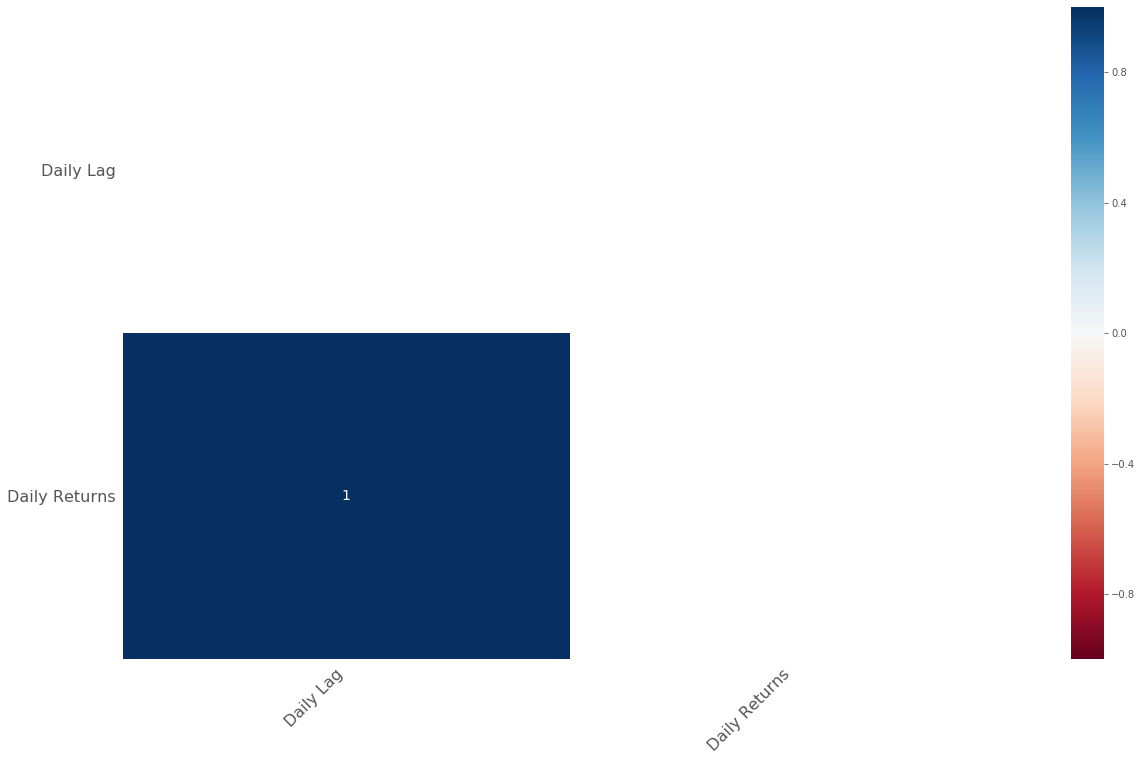

In [127]:
import missingno as msno
msno.heatmap(Dataset)

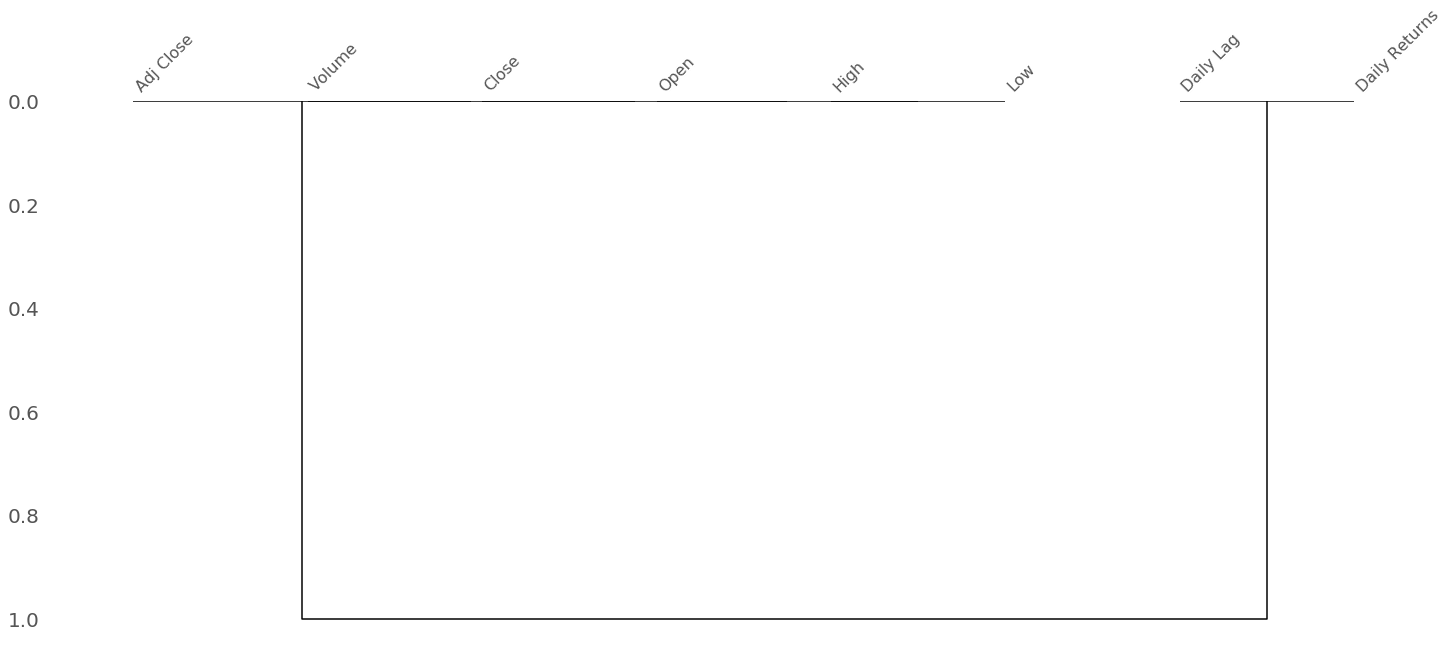

In [129]:
msno.dendrogram(Dataset)

Populating the interactive namespace from numpy and matplotlib


/Users/divyajagarlapoodi/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'table']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


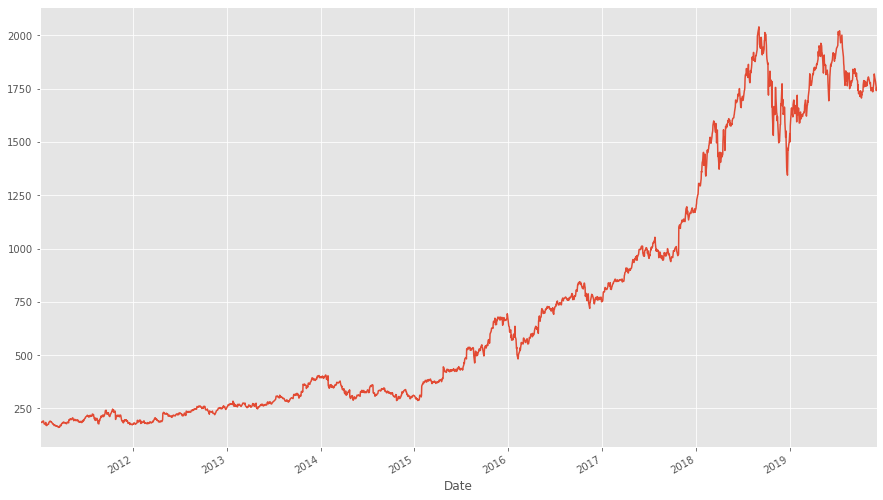

In [130]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
 
Dataset["Adj Close"].plot(grid = True) # Plot the adjusted closing

In [141]:
#Moving Average
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

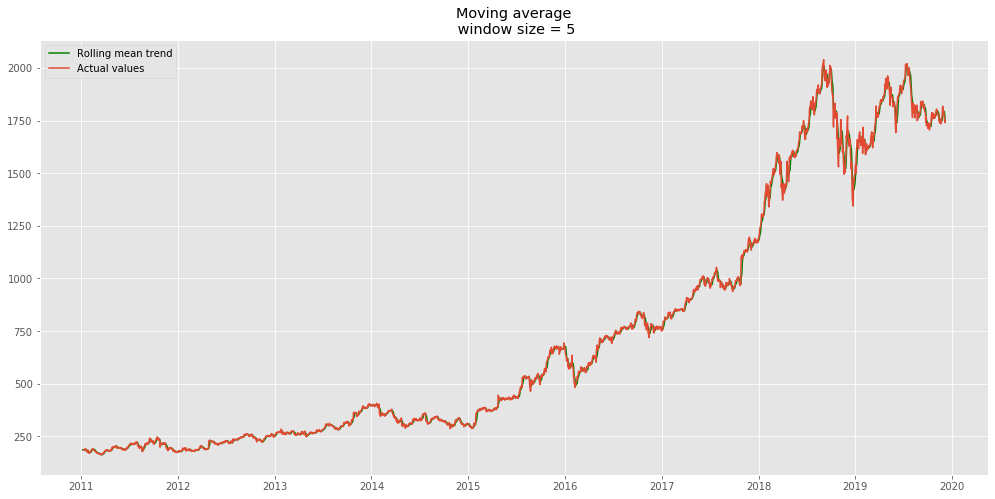

In [143]:
#Smooth by the previous 5 days (by week)
plot_moving_average(Dataset.Close, 5)

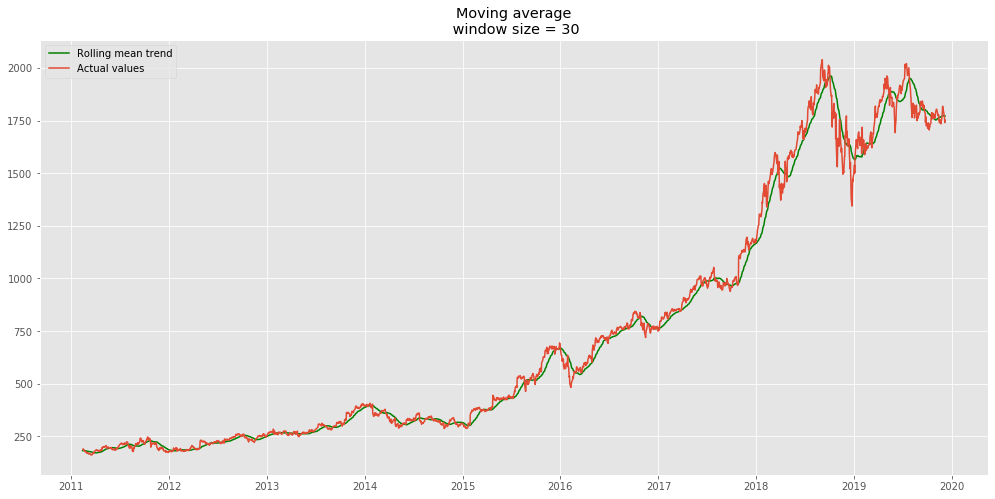

In [144]:
#Smooth by the previous month (30 days)
plot_moving_average(Dataset.Close, 30)

NameError: name 'mean_absolute_error' is not defined

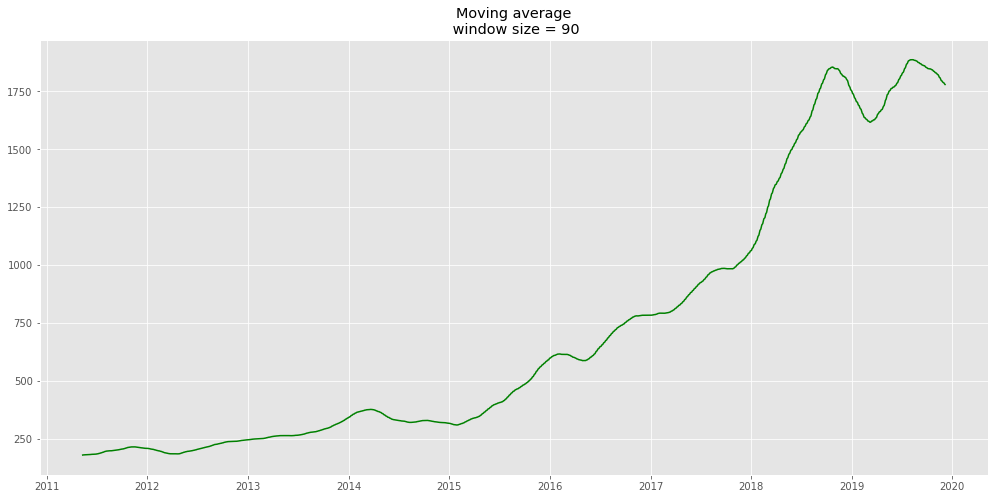

In [145]:
#Smooth by previous quarter (90 days)
plot_moving_average(Dataset.Close, 90, plot_intervals=True)

In [146]:
#exponential Smoothing
def exponential_smoothing(series, alpha):

    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [147]:
def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);

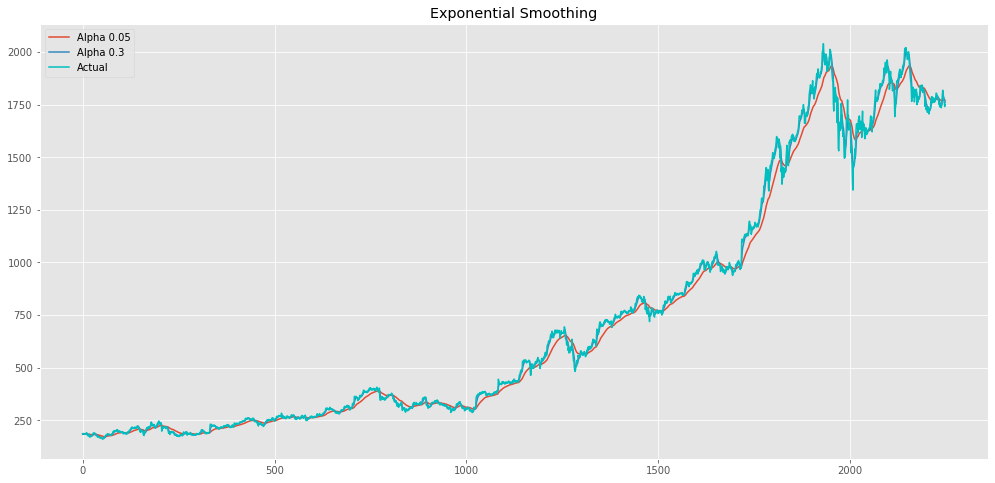

In [149]:
plot_exponential_smoothing(Dataset.Close, [0.05, 0.3])

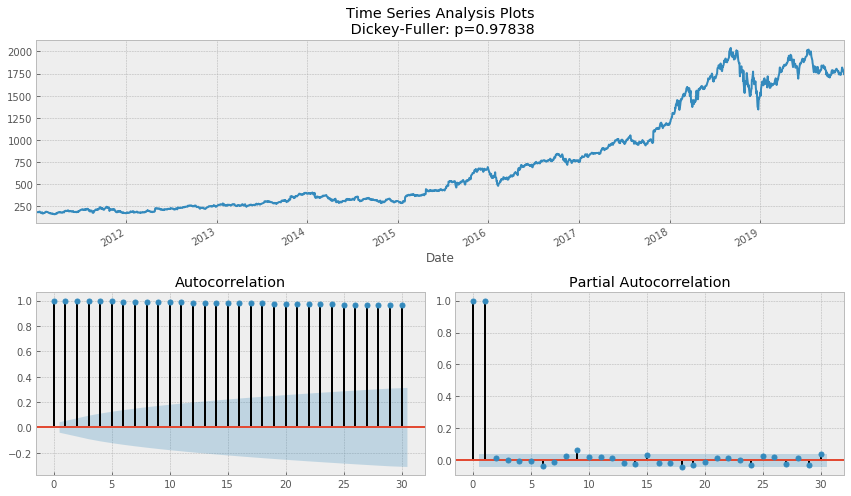

In [153]:
#Stationarity

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(Dataset.Close, lags=30)

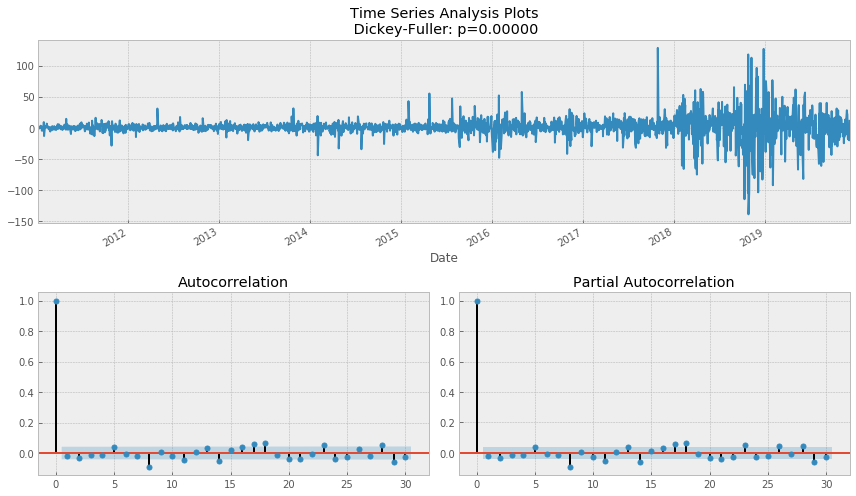

In [154]:
data_diff = Dataset.Close - Dataset.Close.shift(1)

tsplot(data_diff[1:], lags=30)

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [157]:
#SARIMA
#Set initial values and some bounds
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#Create a list with all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

In [161]:
def optimize_SARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
    """
    
    results = []
    best_aic = float('inf')
    
    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(Dataset.Close, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        
        #Save best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])
        
    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #Sort in ascending order, lower AIC is better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

In [162]:
Dataset.shape

(2248, 9)

In [163]:
#Set parameters that give the lowest AIC (Akaike Information Criteria)

p, q, P, Q = result_table.parameters[0]

best_model = sm.tsa.statespace.SARIMAX(Dataset.Close, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

                                 Statespace Model Results                                
Dep. Variable:                             Close   No. Observations:                 2248
Model:             SARIMAX(3, 1, 3)x(0, 1, 2, 5)   Log Likelihood               -9484.788
Date:                           Mon, 09 Dec 2019   AIC                          18987.576
Time:                                   07:26:35   BIC                          19039.012
Sample:                                        0   HQIC                         19006.354
                                          - 2248                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1110      0.040      2.744      0.006       0.032       0.190
ar.L2         -0.3069      0.032     -9.703

In [164]:
 def plot_SARIMA(series, model, n_steps):
    """
        Plot model vs predicted values
        
        series - dataset with time series
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
    """
    
    data = series.copy().rename(columns = {'Close': 'actual'})
    data['arima_model'] = model.fittedvalues
    #Make a shift on s+d steps, because these values were unobserved by the model due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    #Forecast on n_steps forward
    forecast = model.predict(start=Dataset.shape[0], end=Dataset.shape[0] + n_steps)
    forecast = data.arima_model.append(forecast)
    #Calculate error
    error = mean_absolute_percentage_error(Dataset['actual'][s+d:], Dataset['arima_model'][s+d:])
    
    plt.figure(figsize=(17, 8))
    plt.title('Mean Absolute Percentage Error: {0:.2f}%'.format(error))
    plt.plot(forecast, color='r', label='model')
    plt.axvspan(Dataset.index[-1], forecast.index[-1],alpha=0.5, color='lightgrey')
    plt.plot(Dataset, label='actual')
    plt.legend()
    plt.grid(True);
    
# plot_SARIMA(data, best_model, 5)
print(best_model.predict(start=Dataset.Close.shape[0], end=Dataset.Close.shape[0] + 5))
print(mean_absolute_percentage_error(Dataset.Close[s+d:], best_model.fittedvalues[s+d:]))

2248    1752.133190
2249    1749.956293
2250    1751.828310
2251    1751.638473
2252    1753.777580
2253    1755.189086
dtype: float64
1.3293550197995352


In [165]:
comparison = pd.DataFrame({'actual': [18.93, 19.23, 19.08, 19.17, 19.11, 19.12],
                          'predicted': [18.96, 18.97, 18.96, 18.92, 18.94, 18.92]}, 
                          index = pd.date_range(start='2018-06-05', periods=6,))

In [166]:
comparison.head()

,actual,predicted
2018-06-05,18.93,18.96
2018-06-06,19.23,18.97
2018-06-07,19.08,18.96
2018-06-08,19.17,18.92
2018-06-09,19.11,18.94


No handles with labels found to put in legend.


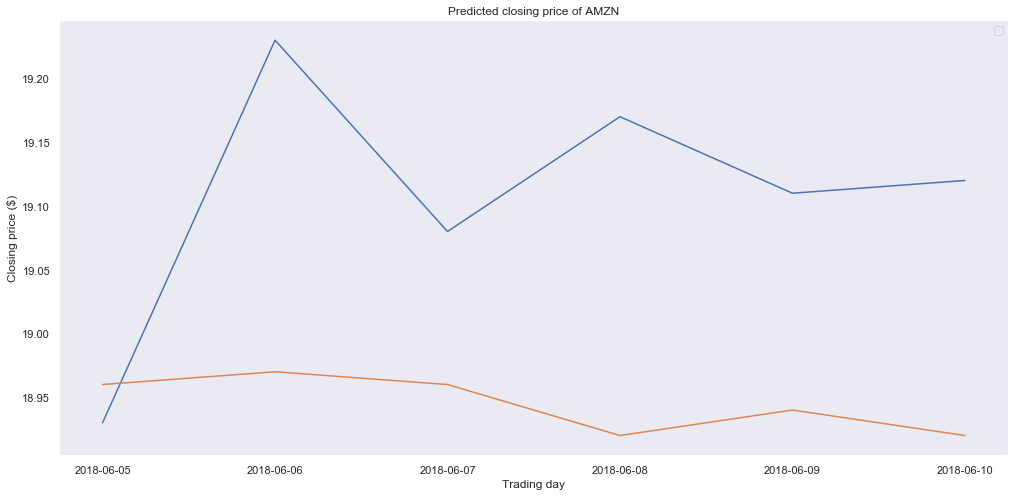

In [167]:
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual)
plt.plot(comparison.predicted)
plt.title('Predicted closing price of AMZN')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.legend(loc='best')
plt.grid(False)
plt.show()


In [ ]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(Amazon)